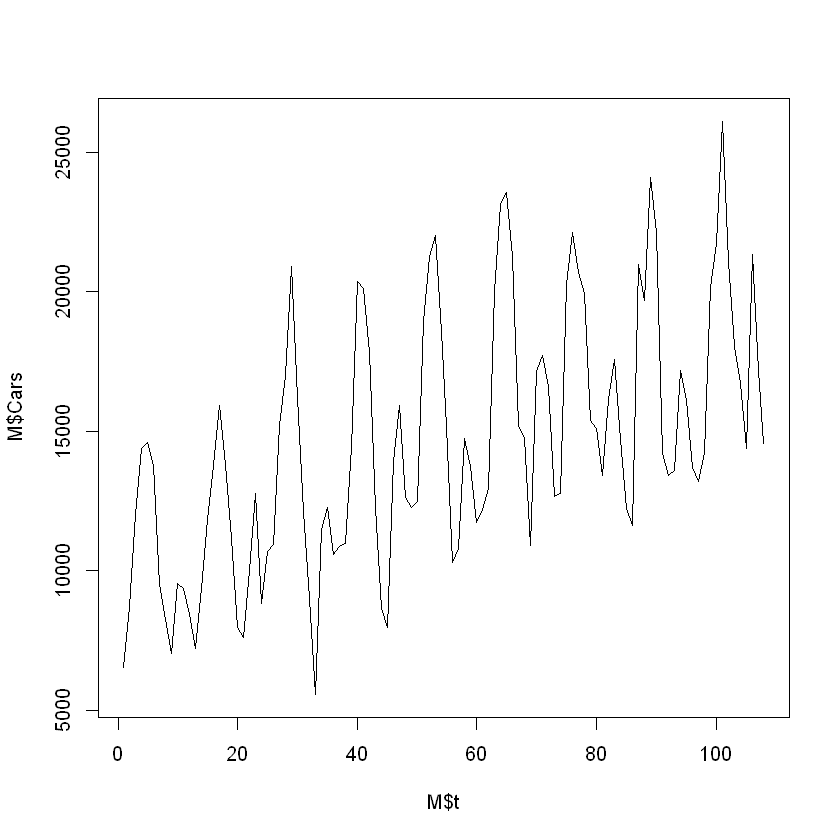

In [27]:
options(warn=-1)
M <- read.csv(file = 'data3.csv', header = TRUE, sep = '\t', dec = ',')
M$t <- seq(1, length(M$Cars))
plot(M$t, M$Cars, type = 'l')

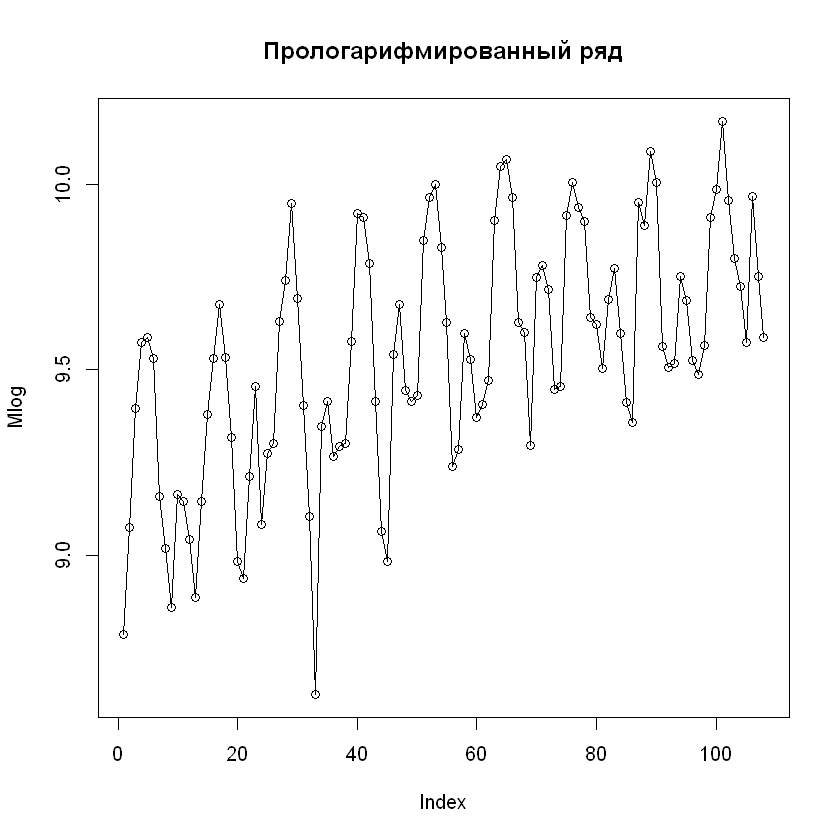

In [ ]:
Mlog <- log(M$Cars)
plot(Mlog, type = 'o', main = 'Прологарифмированный ряд')

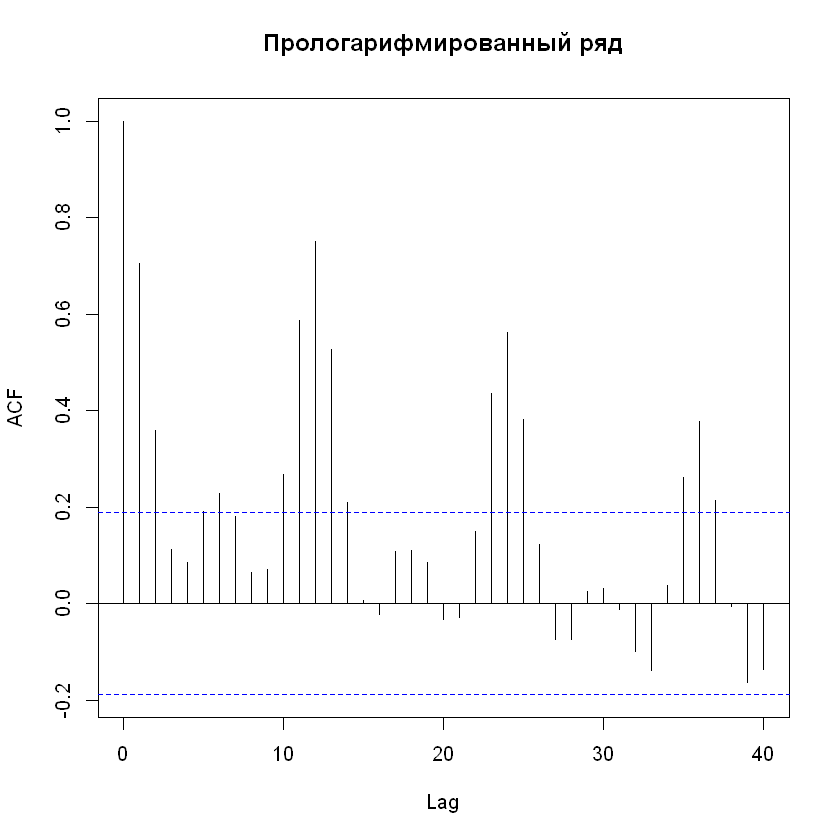

In [ ]:
acf(Mlog, main = "Прологарифмированный ряд", lag.max = 40)

Сезонная компонента с периодом 6 лагов.


Attaching package: 'aTSA'

The following object is masked from 'package:graphics':

    identify



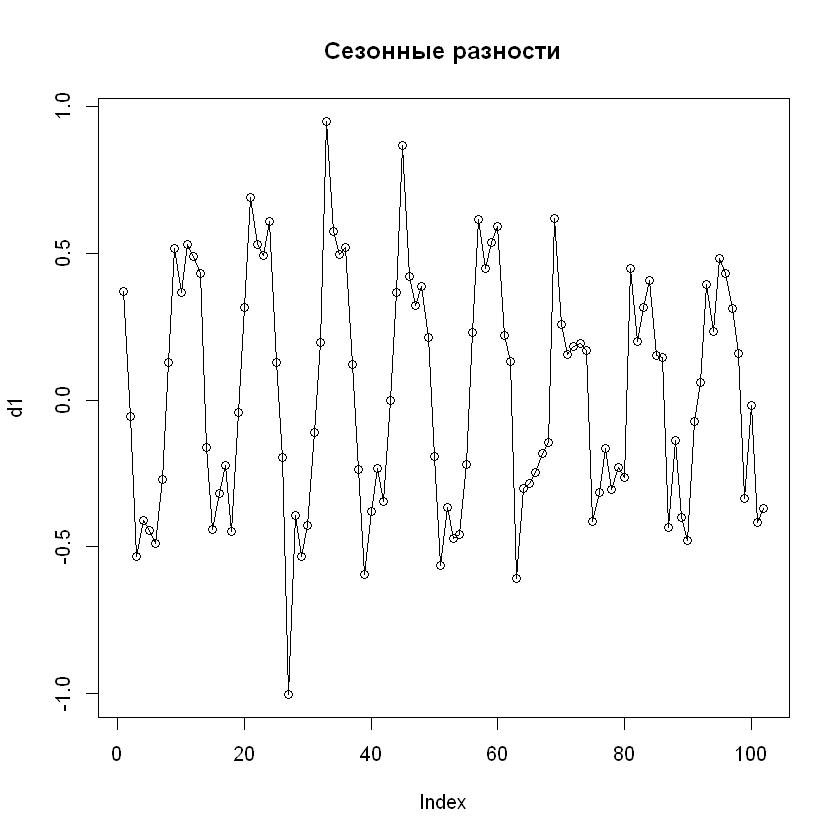

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 -4.33    0.01
[2,]   1 -4.62    0.01
[3,]   2 -5.94    0.01
[4,]   3 -7.16    0.01
[5,]   4 -9.31    0.01
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -4.30    0.01
[2,]   1 -4.60    0.01
[3,]   2 -5.95    0.01
[4,]   3 -7.21    0.01
[5,]   4 -9.49    0.01
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -4.28    0.01
[2,]   1 -4.57    0.01
[3,]   2 -5.91    0.01
[4,]   3 -7.16    0.01
[5,]   4 -9.44    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Phillips-Perron Unit Root Test 
alternative: stationary 
 
Type 1: no drift no trend 
 lag Z_rho p.value
   4 -41.3    0.01
----- 
 Type 2: with drift no trend 
 lag Z_rho p.value
   4 -41.4    0.01
----- 
 Type 3: with drift and trend 
 lag Z_rho p.value
   4 -41.4    0.01
--------------- 
Note: p-value = 0.01 means p.value <= 0.01 


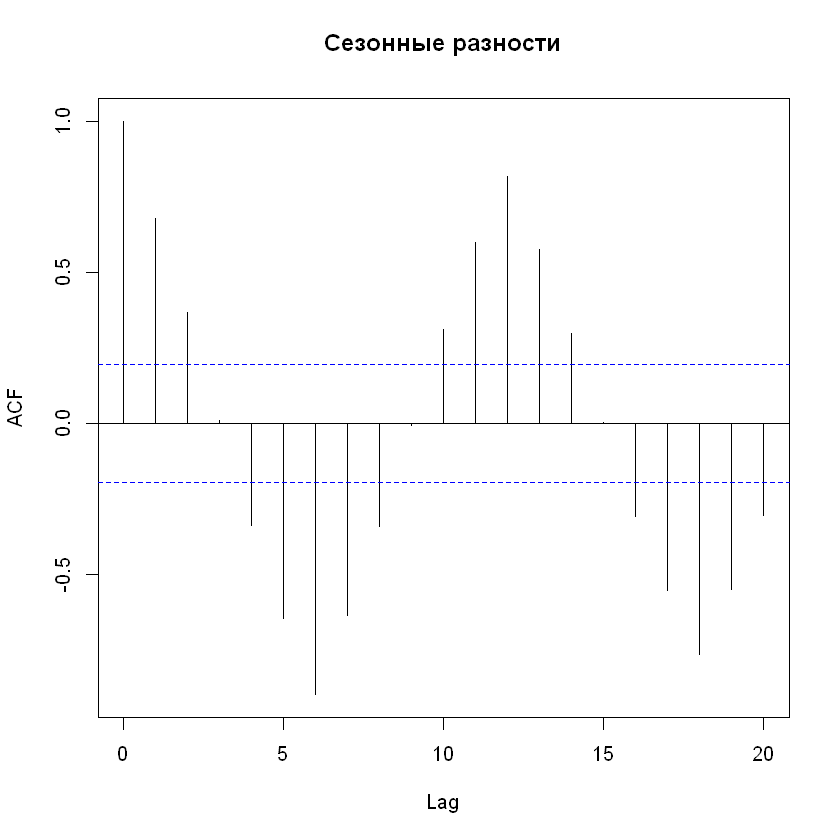

In [ ]:
library(aTSA)
d1 <- diff(Mlog, lag = 6, differences = 1)
plot(d1, type = 'o', main = 'Сезонные разности')
acf(d1, main = 'Сезонные разности')
adf.test(d1)
pp.test(d1)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -10.11    0.01
[2,]   1  -6.52    0.01
[3,]   2  -5.44    0.01
[4,]   3  -4.96    0.01
[5,]   4  -4.73    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -10.05    0.01
[2,]   1  -6.48    0.01
[3,]   2  -5.41    0.01
[4,]   3  -4.94    0.01
[5,]   4  -4.71    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -10.01    0.01
[2,]   1  -6.46    0.01
[3,]   2  -5.40    0.01
[4,]   3  -4.93    0.01
[5,]   4  -4.70    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Phillips-Perron Unit Root Test 
alternative: stationary 
 
Type 1: no drift no trend 
 lag Z_rho p.value
   4  -103    0.01
----- 
 Type 2: with drift no trend 
 lag Z_rho p.value
   4  -104    0.01
----- 
 Type 3: with drift and trend 
 lag Z_rho p.value
   4  -103    0.01
--------------- 
Note: p-value = 0.01 means p.value <= 0.01 


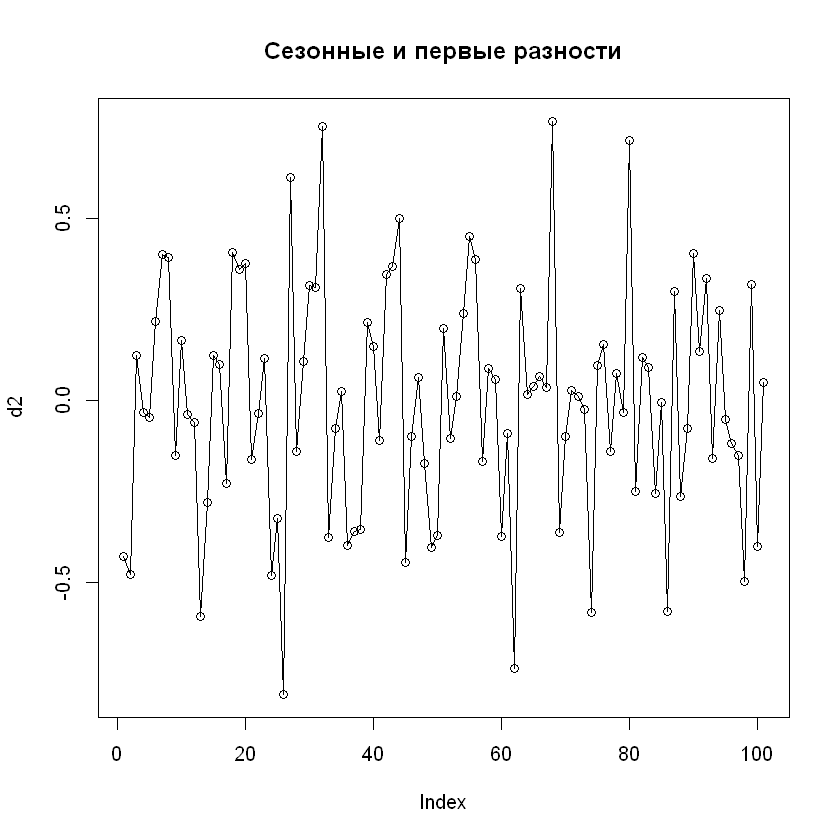

In [ ]:
d2 <- diff(d1, lag = 1, differences = 1)
plot(d2, type = 'o', main = 'Сезонные и первые разности')
adf.test(d2)
pp.test(d2)

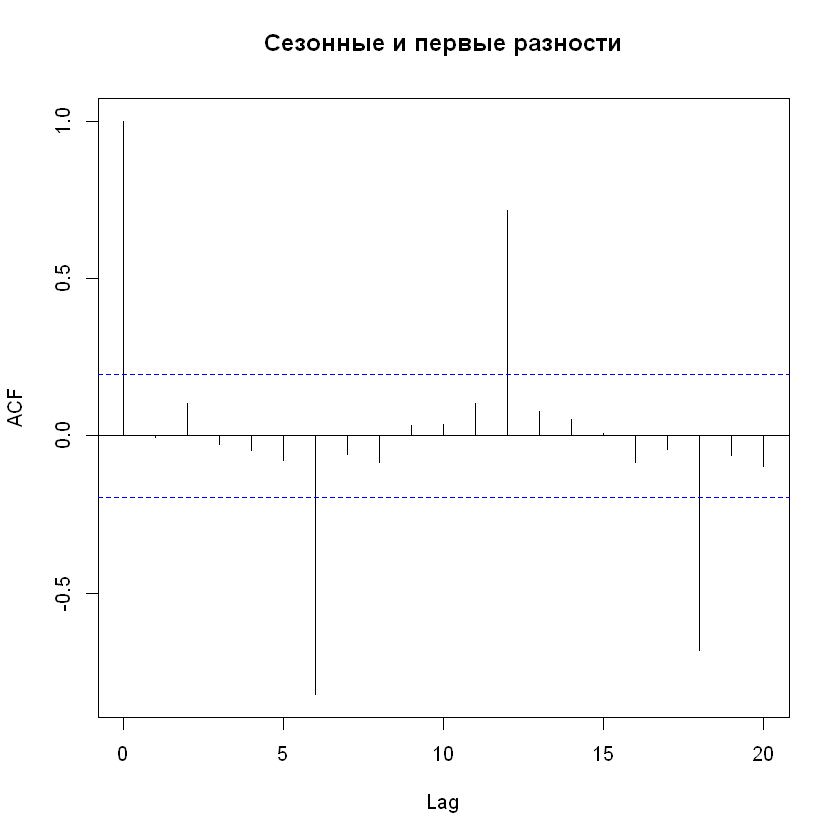

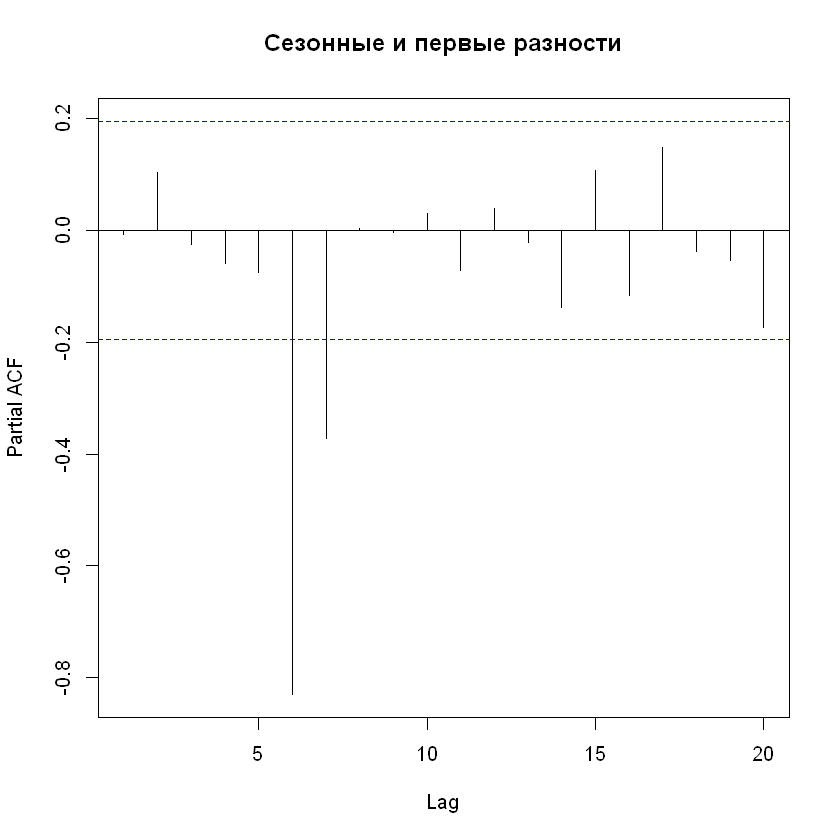

In [ ]:
acf(d2, main = 'Сезонные и первые разности')
acf(d2, type = 'partial', main = 'Сезонные и первые разности')

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Attaching package: 'forecast'

The following object is masked from 'package:aTSA':

    forecast




Call:
arima(x = Mlog, order = c(1, 1, 0), seasonal = list(order = c(1, 1, 0), period = 6))

Coefficients:
          ar1     sar1
      -0.5415  -0.9253
s.e.   0.0850   0.0297

sigma^2 estimated as 0.0175:  log likelihood = 55.02,  aic = -104.05

Training set error measures:
                       ME      RMSE        MAE         MPE     MAPE      MASE
Training set -0.003535483 0.1279466 0.09860986 -0.04633275 1.039947 0.5234677
                    ACF1
Training set -0.07143597



	Box-Pierce test

data:  residuals(fit1)
X-squared = 0.55113, df = 1, p-value = 0.4579


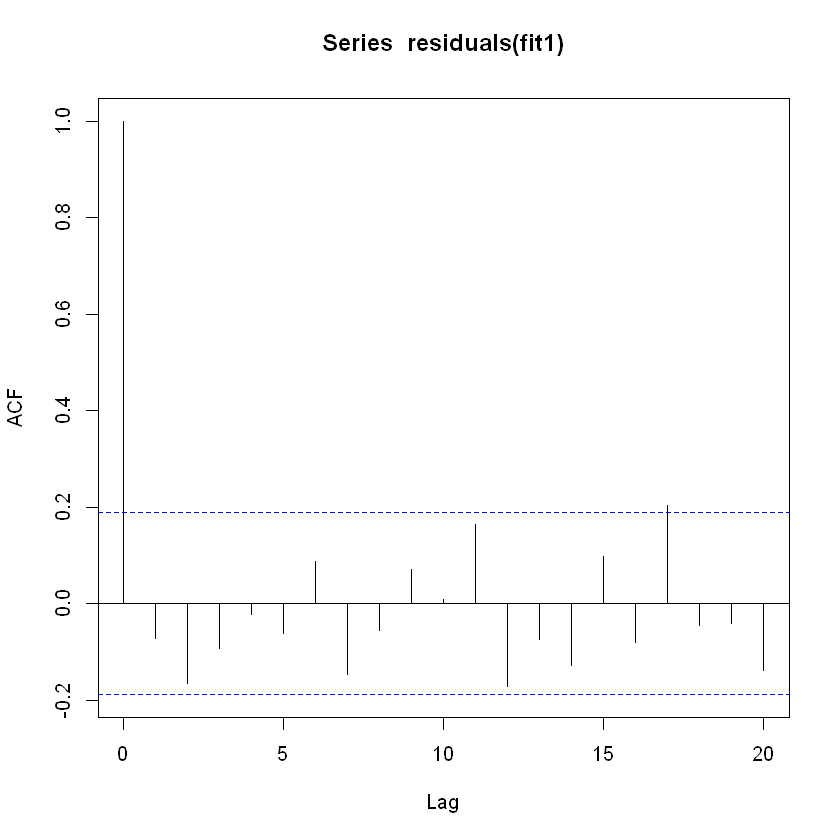

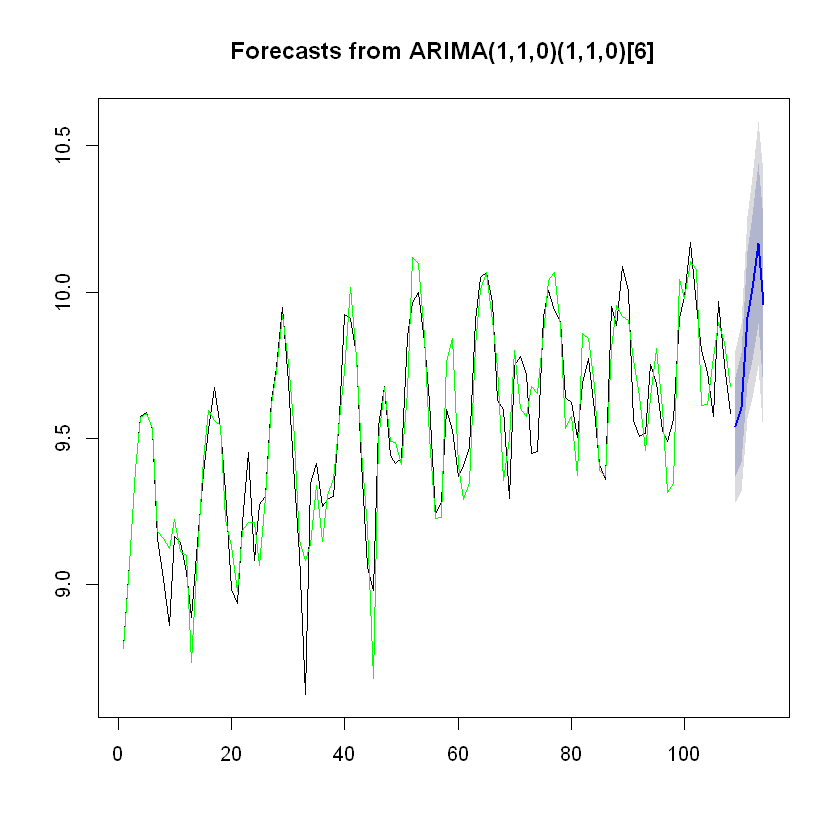

In [ ]:
library(forecast)
fit1 <- arima(Mlog, order=c(1,1,0),
              seasonal = list(order=c(1,1,0), period=6))
summary(fit1)
Box.test(residuals(fit1), type="Box-Pierce")
acf(residuals(fit1))
plot(forecast(fit1,h=6))
lines(fitted(fit1),col="green")

In [ ]:
shapiro.test(residuals(fit1))


	Shapiro-Wilk normality test

data:  residuals(fit1)
W = 0.98807, p-value = 0.4567


In [ ]:
fit2 <- arima(Mlog, order=c(2,1,0),
              seasonal = list(order=c(1,1,0), period=6))

In [ ]:
fit3 <- arima(Mlog, order=c(0,1,1),
              seasonal = list(order=c(1,1,0), period=6))

In [ ]:
fit4 <- arima(Mlog, order=c(0,1,1),
              seasonal = list(order=c(0,1,1), period=6))

In [ ]:
fit5 <- arima(Mlog, order=c(0,1,2),
              seasonal = list(order=c(1,1,0), period=6))

In [ ]:
fit6 <- arima(Mlog, order=c(0,1,2),
              seasonal = list(order=c(0,1,1), period=6))

In [ ]:
fit7 <- arima(Mlog, order=c(1,1,1),
              seasonal = list(order=c(1,1,1), period=6))

In [ ]:
tbl <- BIC(fit1, fit2, fit3, fit4, fit5, fit6, fit7)
tbl <- cbind(tbl, AIC(fit1, fit2, fit3, fit4, fit5, fit6, fit7)$AIC)
colnames(tbl) <- c('df', 'BIC', 'AIC')
tbl$MAPE <- c(accuracy(fit1)[5],
             accuracy(fit2)[5],
             accuracy(fit3)[5],
             accuracy(fit4)[5],
             accuracy(fit5)[5],
             accuracy(fit6)[5],
             accuracy(fit7)[5])

In [ ]:
tbl

,df,BIC,AIC,MAPE
fit1,3,-96.20047,-104.04583,1.0399475
fit2,4,-92.52780,-102.98828,1.0363478
fit3,3,-100.54495,-108.39031,1.0074686
fit4,3,-20.79221,-28.63757,1.4118688
fit5,4,-96.23359,-106.69407,1.0040043
fit6,4,-16.83681,-27.29730,1.4183272
fit7,5,-97.95357,-111.02917,0.9628415


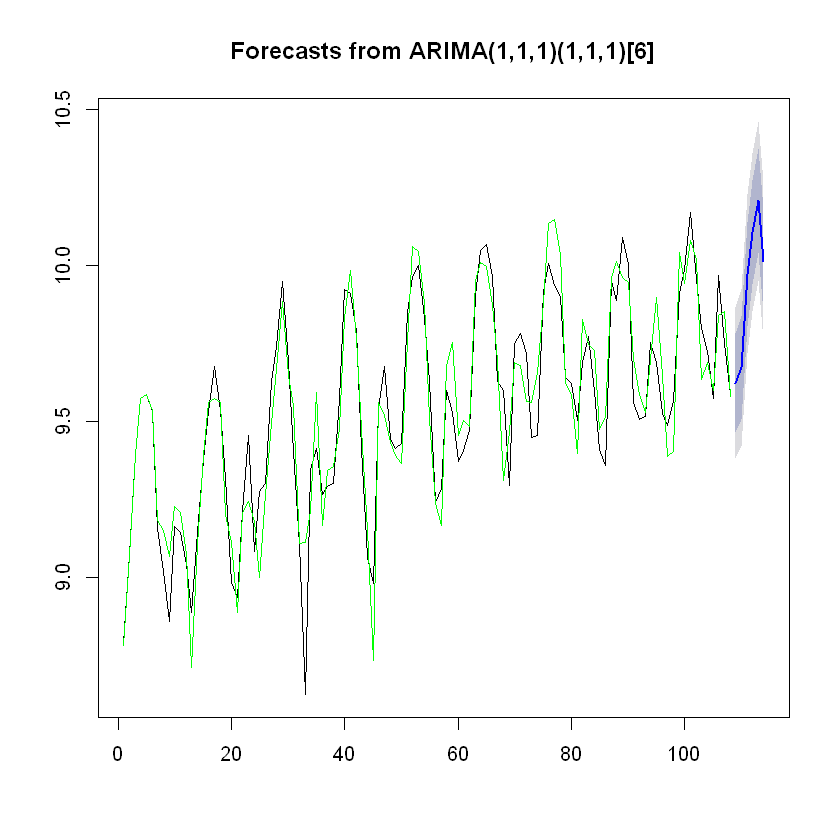

In [ ]:
plot(forecast(fit7, h=6))
lines(fitted(fit7), col="green")


Call:
arima(x = Mlog, order = c(0, 0, 1), seasonal = list(order = c(1, 1, 0), period = 6))

Coefficients:
         ma1     sar1
      0.2486  -0.9103
s.e.  0.0722   0.0335

sigma^2 estimated as 0.01927:  log likelihood = 51.35,  aic = -96.7

Training set error measures:
                     ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.04670311 0.1349281 0.1044414 0.4762644 1.097542 0.5544242
                    ACF1
Training set -0.02871061


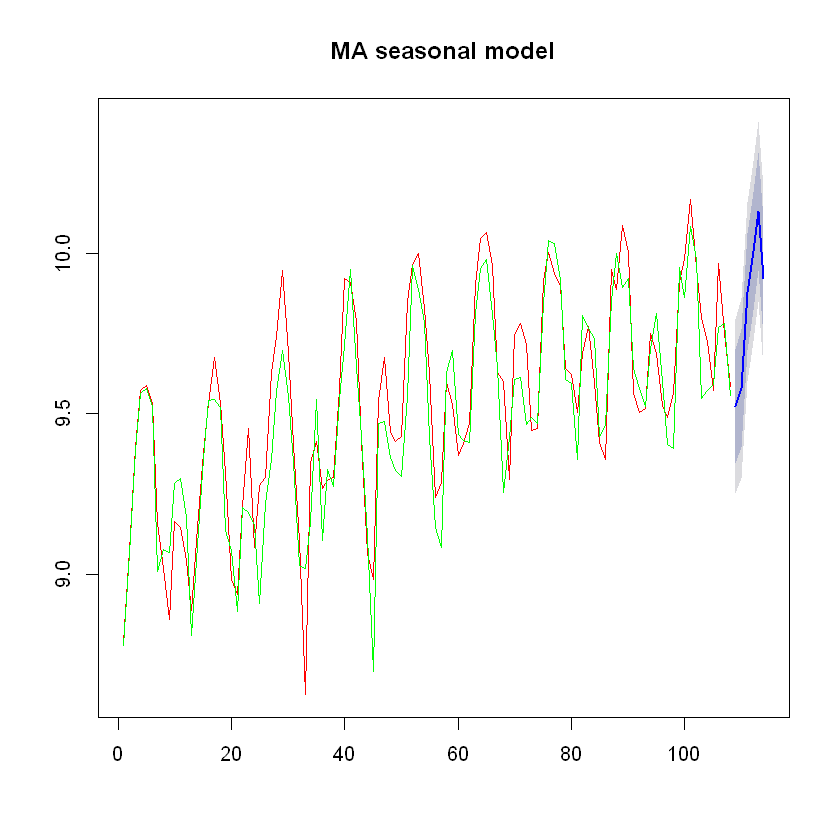

In [29]:
ma_model <- arima(Mlog, order=c(0,0,1), seasonal = list(order=c(1,1,0), period=6))
summary(ma_model)
plot(forecast(ma_model, h=6), col = 'red', main = 'MA seasonal model')
lines(fitted(ma_model), col="green")

In [91]:
t <- seq(1, length(Mlog))
m5 <- nls(Mlog ~ f * t +  a * sin(pi/6 * t + d) + b, start = list(f = 1, a = 1, b = 0, d = 0))

[1] "MAPE"


[1] 1.702325

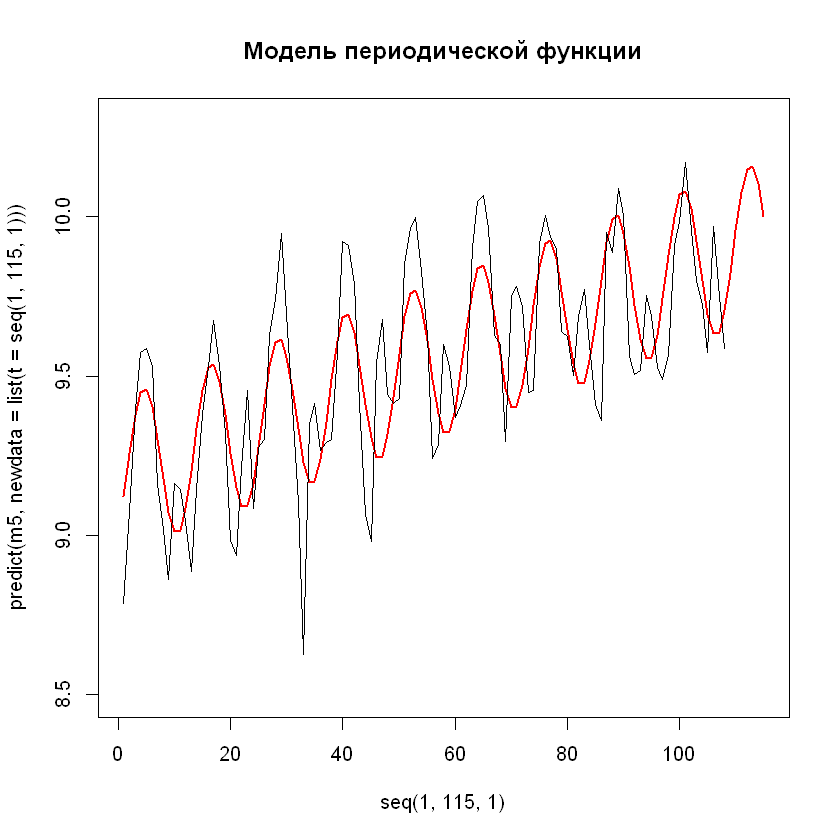

In [102]:
plot(seq(1, 115, 1), predict(m5, newdata = list(t = seq(1, 115, 1))),
     type = 'l', ylim = c(8.5, 10.3), col = 'red', main = 'Модель периодической функции', lwd = 2)
lines(M$t, Mlog, col = 'black', type = 'l', lwd = 1)
print('MAPE')
sum(abs((fitted(m5) - Mlog)/Mlog)) * 100 / length(Mlog)